In [5]:
# ✅ Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# ✅ Step 2: Load the dataset
df = pd.read_csv("/content/House Price Prediction Dataset.csv")  # Update filename if different

# View top rows
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [7]:
# ✅ Step 3: Check nulls and select key columns
print(df.isnull().sum())

# Select features and target
features = ['Area', 'Bedrooms', 'Location']
target = 'Price'
data = df[features + [target]].copy()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [8]:
# ✅ Step 4: One-hot encode 'Location'
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Split into input (X) and output (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Scale numeric features
scaler = StandardScaler()
X[['Area', 'Bedrooms']] = scaler.fit_transform(X[['Area', 'Bedrooms']])

In [9]:
# ✅ Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Predict
y_pred = model.predict(X_test)

In [10]:
# ✅ Step 6: Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Mean Absolute Error (MAE): {mae:,.2f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:,.2f}")

📊 Mean Absolute Error (MAE): 241,340.17
📈 Root Mean Squared Error (RMSE): 278,152.90


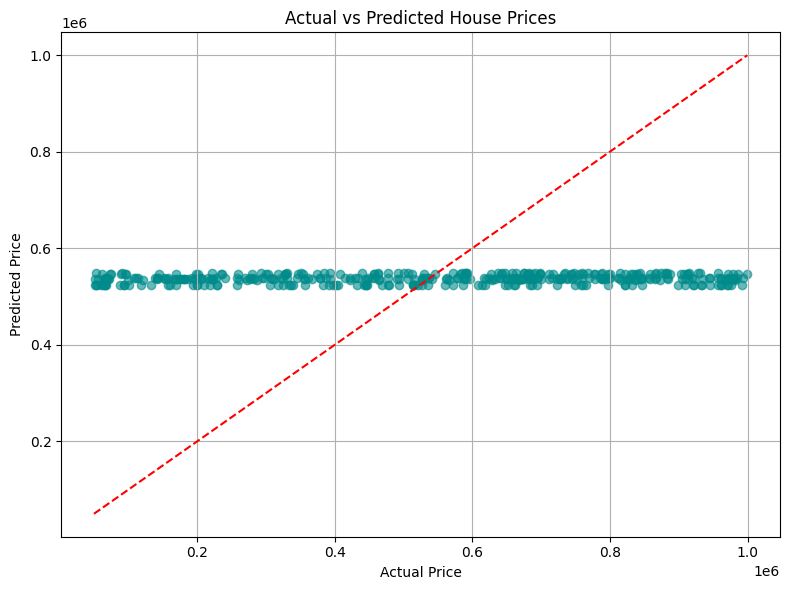

In [11]:
# ✅ Step 7: Plot actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkcyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()